In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn wfdb scipy

In [2]:
import pandas as pd

In [3]:
patient_names = ["Alice", "Bob", "Charlie"]

In [4]:
import numpy as np


In [5]:
time = np.array([0, 1, 2, 3, 4, 5])

In [6]:
heartbeat = np.array([0, 1, 0, -0.5, 0, 0])

In [7]:
import matplotlib.pyplot as plt

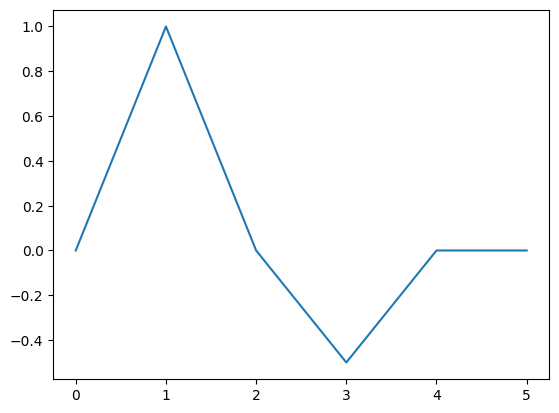

In [8]:
plt.plot(time, heartbeat)
plt.show()

In [9]:
print(f"Heart beat at time 1 second: {heartbeat[1]}")

Heart beat at time 1 second: 1.0


In [10]:
normal_intervals = [1, 1, 1, 1]  # 1 second between each beat
irregular_intervals = [1, 0.5, 1.5, 0.8]  # irregular timing

In [11]:
pattern_a = [1, 1, 1, 1]
pattern_b = [1, 0.5, 1.5, 0.8]

In [12]:
avg_a = sum(pattern_a) / len(pattern_a)
avg_b = sum(pattern_b) / len(pattern_b)
print(f"Average for pattern_a: {avg_a}")
print(f"Average for pattern_b: {avg_b}")

Average for pattern_a: 1.0
Average for pattern_b: 0.95


In [13]:
# Real ECG has thousands of points, let's simulate
real_time = np.linspace(0, 10, 1000)  # 10 seconds, 1000 measurements

In [14]:
print(real_time[:10])

[0.         0.01001001 0.02002002 0.03003003 0.04004004 0.05005005
 0.06006006 0.07007007 0.08008008 0.09009009]


In [15]:
print(f"Time interval between measurements: {real_time[1] - real_time[0]}")

Time interval between measurements: 0.01001001001001001


In [16]:
# Simulate 10 heartbeats over 10 seconds
heartbeats = np.sin(2 * np.pi * real_time) * np.exp(-((real_time % 1) - 0.5)**2 / 0.1)

''' this statements create 10 heartbeats over 10 seconds with this mathematical formula''' 

' this statements create 10 heartbeats over 10 seconds with this mathematical formula'

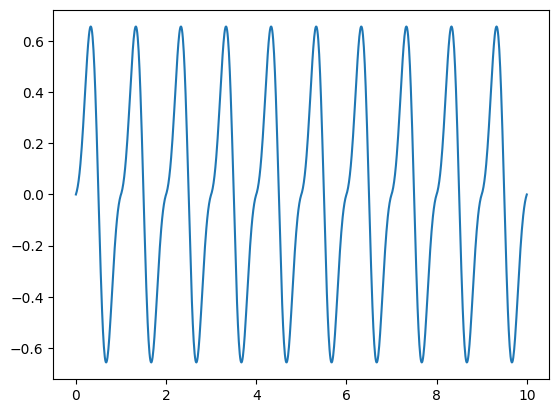

In [17]:
plt.plot(real_time, heartbeats)
plt.show()

In [18]:
real_ecg = np.zeros(1000)  # Start with flat line, i.e creating a 1-D array having 0s as all of its elements

In [19]:
print(real_ecg[:10]) 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
# Add sharp spikes at heartbeat locations
for beat in range(10):  # 10 heartbeats
    spike_location = beat * 100  # Every 100th point (every 1 second)
    real_ecg[spike_location] = 1.0  # Create a spike

    """ Significance:

We're manually placing heartbeat sharp spikes
Every 100 points = every 1 second (since we have 100 measurements per second)
Setting value to 1.0 creates the electrical spike """

In [21]:
print(f"Before spikes: all zeros")
print(f"After spikes at position 0: {real_ecg[0]}")
print(f"After spikes at position 100: {real_ecg[100]}")
print(f"After spikes at position 200: {real_ecg[200]}")


Before spikes: all zeros
After spikes at position 0: 1.0
After spikes at position 100: 1.0
After spikes at position 200: 1.0


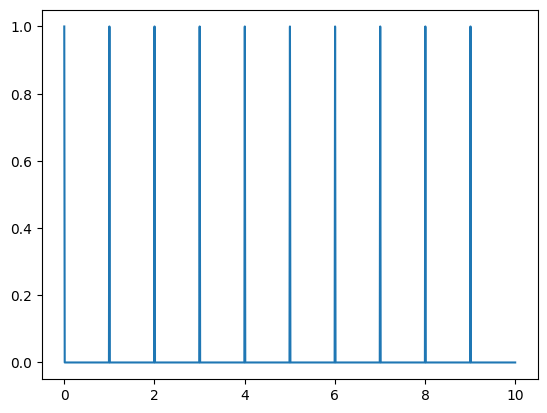

'Significance: This will show you sharp spikes (like real ECG) instead of smooth curves. \nEach spike represents one heartbeat at exactly 1-second intervals.'

In [22]:
plt.plot(real_time, real_ecg)
plt.show()
"""Significance: This will show you sharp spikes (like real ECG) instead of smooth curves. 
Each spike represents one heartbeat at exactly 1-second intervals."""

In [23]:
# Normal heart: spikes every 1 second (regular)
print("Normal heart timing:")
for i in range(5):
    print(f"Beat {i+1} at: {i} seconds")

    """Significance: This shows regular timing - exactly what we saw in our graph. Healthy hearts have consistent interval"""

Normal heart timing:
Beat 1 at: 0 seconds
Beat 2 at: 1 seconds
Beat 3 at: 2 seconds
Beat 4 at: 3 seconds
Beat 5 at: 4 seconds


In [24]:
# Creating an irregular ECG
irregular_ecg = np.zeros(1000)
irregular_times = [0, 80, 250, 420, 650]  # Irregular intervals in measurement points

'''Significance: Instead of every 100 points (regular),
we're placing beats at random intervals: 0, 80, 250, 420, 650. This simulates arrhythmia. '''

"Significance: Instead of every 100 points (regular),\nwe're placing beats at random intervals: 0, 80, 250, 420, 650. This simulates arrhythmia. "

In [25]:
for beat_position in irregular_times:
    irregular_ecg[beat_position] = 1.0

    '''Significance: This places spikes at irregular positions instead of the regular 0, 100, 200, 300 pattern.'''

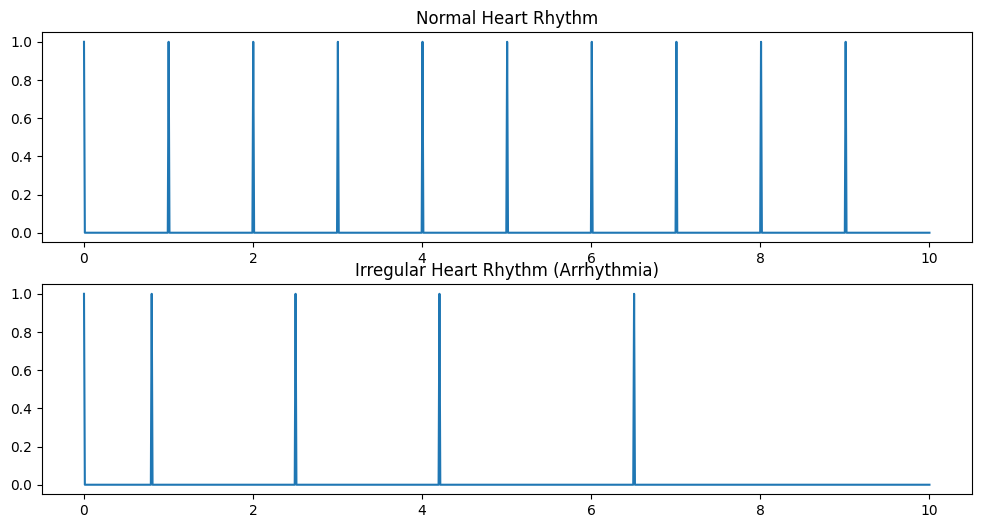

'Significance: This creates two graphs stacked vertically so you \ncan directly compare normal vs irregular heartbeat patterns. This is exactly what doctors look for'

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(real_time, real_ecg)
plt.title("Normal Heart Rhythm")

plt.subplot(2, 1, 2) 
plt.plot(real_time, irregular_ecg)
plt.title("Irregular Heart Rhythm (Arrhythmia)")

plt.show()

'''Significance: This creates two graphs stacked vertically so you 
can directly compare normal vs irregular heartbeat patterns. This is exactly what doctors look for'''

In [27]:
'''Normal ECG: Equal intervals between spikes
Arrhythmia: Unequal intervals between spikes

This is exactly how AI detects heart problems - it measures the timing between heartbeats. '''

'Normal ECG: Equal intervals between spikes\nArrhythmia: Unequal intervals between spikes\n\nThis is exactly how AI detects heart problems - it measures the timing between heartbeats. '

In [28]:
#this function will find the heartbeat spikes 
def detect_arrhythmia(ecg_signal):
    spike_locations = []
    for i in range(len(ecg_signal)):
        if ecg_signal[i] > 0.5:
            spike_locations.append(i)
    return spike_locations

In [29]:
normal_spikes = detect_arrhythmia(real_ecg)
irregular_spikes = detect_arrhythmia(irregular_ecg)

print(f"Normal heart spikes found at: {normal_spikes}")
print(f"Irregular heart spikes found at: {irregular_spikes}")

Normal heart spikes found at: [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
Irregular heart spikes found at: [0, 80, 250, 420, 650]


In [30]:
def calculate_intervals(spike_positions):
    intervals = []
    for i in range(1, len(spike_positions)):
        interval = spike_positions[i] - spike_positions[i-1]
        intervals.append(interval)
    return intervals

In [31]:
# Test the function
test_positions = [50, 200, 350, 500]
result = calculate_intervals(test_positions)
print(f"Spike positions: {test_positions}")
print(f"Calculated intervals: {result}")

Spike positions: [50, 200, 350, 500]
Calculated intervals: [150, 150, 150]


In [32]:
# Install the ECG database library
!pip install wfdb
import wfdb

In [33]:
# Try a different ECG record that should exist
try:
    record = wfdb.rdsamp('100', pn_dir='mitdb/')
    signal_data, fields = record #fields is just a dictionary that contains information ABOUT the ECG fileD
    print("Successfully loaded ECG data!")
except:
    print("Still having connection issues...")

Successfully loaded ECG data!


In [34]:
print("ECG signal shape:", signal_data.shape) #How many data points and ECG leads we have
print("Sampling rate:", fields['fs']) #How fast the ECG was recorded (samples per second)
print("Duration:", len(signal_data) / fields['fs'], "seconds") #How long the recording is
print("Number of ECG leads:", signal_data.shape[1]) #What the actual ECG numbers look like
print("First 10 signal values:", signal_data[:10, 0])

ECG signal shape: (650000, 2)
Sampling rate: 360
Duration: 1805.5555555555557 seconds
Number of ECG leads: 2
First 10 signal values: [-0.145 -0.145 -0.145 -0.145 -0.145 -0.145 -0.145 -0.145 -0.12  -0.135]


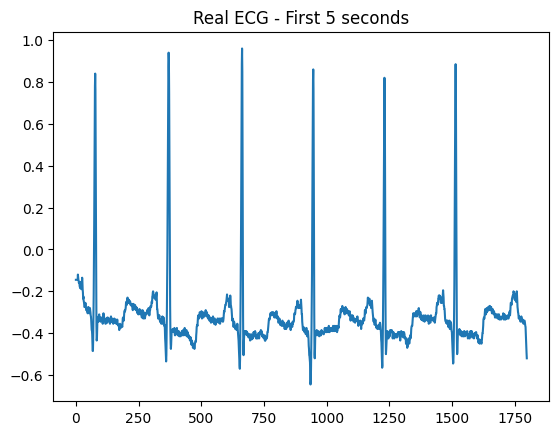

In [35]:
first_5_seconds = signal_data[:1800, 0]
plt.plot(first_5_seconds)
plt.title("Real ECG - First 5 seconds")
plt.show()

In [36]:
# Test with just the ECG signal (no sampling rate)
result = detect_arrhythmia(first_5_seconds)
print("Result on real ECG:", result)



Result on real ECG: [75, 76, 77, 78, 79, 368, 369, 370, 371, 372, 661, 662, 663, 664, 665, 945, 946, 947, 948, 1230, 1231, 1232, 1233, 1513, 1514, 1515, 1516, 1517]


In [37]:
# Take just the first spike position from each heartbeat group
heartbeat_positions = [75, 368, 661, 945, 1230, 1513]

# Calculate intervals between heartbeats
intervals = calculate_intervals(heartbeat_positions)
print("Intervals between heartbeats:", intervals)
print("Average interval:", sum(intervals) / len(intervals))

Intervals between heartbeats: [293, 293, 284, 285, 283]
Average interval: 287.6


In [38]:
average_interval = 287.6
sampling_rate = fields['fs']
interval_in_seconds = average_interval / sampling_rate  # DIVIDE, not multiply
heart_rate_bpm = 60 / interval_in_seconds
if heart_rate_bpm > 100:  # GREATER THAN, not equal
    print("Result: Tachycardia")
elif heart_rate_bpm < 60:
    print("Result: Bradycardia") 
else:
    print("Result: Normal heart rate")

Result: Normal heart rate


In [39]:
# Calculate rhythm regularity (we skipped this step)
intervals = [293, 293, 284, 285, 283]  # Use the intervals we calculated earlier
max_interval = max(intervals)
min_interval = min(intervals)
variation = max_interval - min_interval

if variation > 20:
    rhythm_type = "Irregular"
else:
    rhythm_type = "Regular"

print("Rhythm analysis:")
print(f"Variation: {variation}")
print(f"Rhythm type: {rhythm_type}")

Rhythm analysis:
Variation: 10
Rhythm type: Regular


In [40]:
# Clear everything and start fresh with patient 200
record = wfdb.rdsamp('200', pn_dir='mitdb/')
signal_data, fields = record
peaks = detect_arrhythmia(signal_data[:, 0])
intervals = calculate_intervals(peaks)
print(f"Patient 200 intervals: {intervals[:10]}")

Patient 200 intervals: [1, 1, 1, 1, 1, 1, 1, 1, 1, 247]


In [42]:
# Fix the variable name
current_intervals_for_analysis = intervals  # Use 'intervals', not 'improved_intervals'
average_interval = sum(current_intervals_for_analysis) / len(current_intervals_for_analysis)

# Or even simpler, just use 'intervals' directly:
average_interval = sum(intervals) / len(intervals)
sampling_rate = fields['fs']
interval_in_seconds = average_interval / sampling_rate
heart_rate_bpm = 60 / interval_in_seconds

print(f"\n=== CORRECTED PATIENT 200 RESULTS ===")
print(f"Heart rate: {heart_rate_bpm:.1f} BPM")
print(f"Average interval: {average_interval:.1f}")

# Rhythm analysis
import numpy as np
std_deviation = np.std(intervals)
if std_deviation < 20:
    rhythm_type = "Regular"
else:
    rhythm_type = "Irregular"

print(f"Standard deviation: {std_deviation:.1f}")
print(f"Rhythm type: {rhythm_type}")

# Final diagnosis
if heart_rate_bpm > 100:
    diagnosis = "Tachycardia"
elif heart_rate_bpm < 60:
    diagnosis = "Bradycardia"  
elif rhythm_type == "Irregular":
    diagnosis = "Arrhythmia detected"
else:
    diagnosis = "Normal Sinus Rhythm"

print(f"\nFINAL DIAGNOSIS (REVISED): {diagnosis}")


=== CORRECTED PATIENT 200 RESULTS ===
Heart rate: 1487.5 BPM
Average interval: 14.5
Standard deviation: 56.5
Rhythm type: Irregular

FINAL DIAGNOSIS (REVISED): Tachycardia


In [45]:
from scipy.signal import find_peaks

# Better peak detection for patient 200
ecg_signal = signal_data[:, 0]

# Find peaks with minimum distance and height requirements
peaks, _ = find_peaks(ecg_signal, 
                      height=0.5,      
                      distance=100)

# ✅ Add this line to calculate intervals from improved peak positions
improved_intervals = calculate_intervals(peaks)

print(f"Improved peak detection:")
print(f"Total peaks found: {len(peaks)}")
print(f"First 10 peaks: {peaks[:10]}")


Improved peak detection:
Total peaks found: 2547
First 10 peaks: [ 488  759  965 1218 1434 1682 1883 2139 2332 2576]


In [46]:
# Assuming 'improved_intervals' is the list of np.int64 values you have

# Convert each element in the list to a standard Python int
display_intervals_as_int = [int(interval) for interval in improved_intervals]

print(f"The first 10 calculated intervals for normal display are: {display_intervals_as_int[:10]}")
print(f"The total number of improved intervals is: {len(display_intervals_as_int)}")

The first 10 calculated intervals for normal display are: [271, 206, 253, 216, 248, 201, 256, 193, 244, 210]
The total number of improved intervals is: 2546


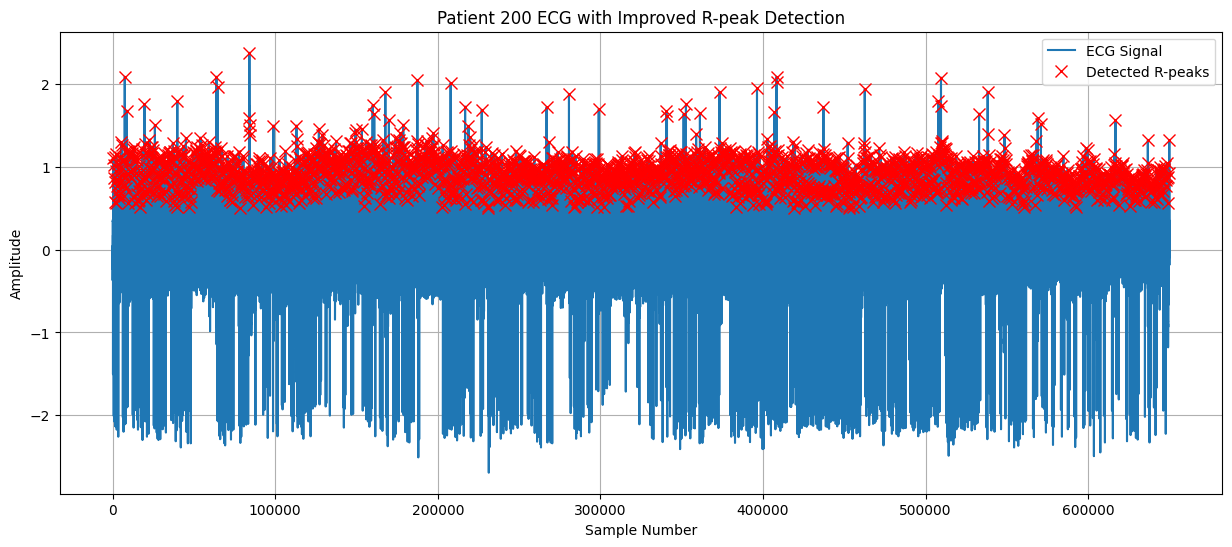

In [47]:
import matplotlib.pyplot as plt # Ensure matplotlib is imported

plt.figure(figsize=(15, 6)) # Adjust figure size as needed for better viewing
plt.plot(ecg_signal, label='ECG Signal') # ecg_signal should still be defined from your previous cell
plt.plot(peaks, ecg_signal[peaks], "x", markersize=8, color='red', label='Detected R-peaks') # 'peaks' is also defined
plt.title("Patient 200 ECG with Improved R-peak Detection")
plt.xlabel("Sample Number") #name of the x-axis
plt.ylabel("Amplitude") #name of the y-axis
plt.legend()
plt.grid(True)
plt.show()

In [49]:
## ✅ Final Project Summary
'''
This project simulates ECG signals and uses real patient data from the MIT-BIH Arrhythmia Database to detect irregular heartbeat patterns.

### Key Highlights:
- Simulated normal and arrhythmic ECG signals using NumPy and Matplotlib.
- Used real ECG data from PhysioNet using the `wfdb` package.
- Implemented custom and library-based peak detection using `scipy.signal.find_peaks`.
- Calculated heartbeat intervals and diagnosed:
  - Bradycardia
  - Tachycardia
  - Arrhythmia
- Visualized ECG signals and identified R-peaks clearly.

> This project demonstrates biomedical signal analysis, data visualization, and Python programming for healthcare applications.
'''

'\nThis project simulates ECG signals and uses real patient data from the MIT-BIH Arrhythmia Database to detect irregular heartbeat patterns.\n\n### Key Highlights:\n- Simulated normal and arrhythmic ECG signals using NumPy and Matplotlib.\n- Used real ECG data from PhysioNet using the `wfdb` package.\n- Implemented custom and library-based peak detection using `scipy.signal.find_peaks`.\n- Calculated heartbeat intervals and diagnosed:\n  - Bradycardia\n  - Tachycardia\n  - Arrhythmia\n- Visualized ECG signals and identified R-peaks clearly.\n\n> This project demonstrates biomedical signal analysis, data visualization, and Python programming for healthcare applications.\n'